<a href="https://colab.research.google.com/github/Tinku4-ux/codesoft/blob/main/Image2Biomass_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi


Fri Nov  7 16:31:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install numpy pandas matplotlib opencv-python scikit-learn torch torchvision torchaudio --quiet


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
!ls /content/drive/MyDrive/


 040127_7.ChatGpt
 abc_id.pdf
 Classroom
'Colab Notebooks'
'IMG-20241219-WA0265 (1).jpg'
'IMG-20241219-WA0265 (2).jpg'
'IMG-20241219-WA0265 (3).jpg'
 IMG-20241219-WA0265.jpg
 IMG_20250502_173239.jpg
 IMG_20250902_180819.jpg
 IMG_8220.JPG
 inbound1066566401622506371.jpg
 inbound2094929519856613729.pdf
 loop.vbs
'MUSIC RECOMMENDER SYSTEM.zip'
'my_resume (7)_26-Apr-25_22.50.16.pdf'
'my_resume (7).pdf'
 PriyanakaResume.pdf
 resume
 Screenshot_2024-10-22-21-46-10-39_944a2809ea1b4cda6ef12d1db9048ed3.jpg
 Screenshot_2025-02-23-19-54-59-61_4336b74596784d9a2aa81f87c2016f50.jpg
 Screenshot_2025-04-27-10-33-37-45_944a2809ea1b4cda6ef12d1db9048ed3.jpg
 Screenshot_2025-05-10-16-44-05-37_40deb401b9ffe8e1df2f1cc5ba480b12.jpg
 Screenshot_2025-06-08-17-05-49-07_6012fa4d4ddec268fc5c7112cbb265e7.jpg
 Screenshot_2025-06-08-17-06-08-05_6012fa4d4ddec268fc5c7112cbb265e7.jpg
 Screenshot_2025-06-08-17-20-07-11_6012fa4d4ddec268fc5c7112cbb265e7.jpg
 Screenshot_2025-06-08-17-20-40-87_6012fa4d4ddec268fc5c7112cbb265

In [10]:
from google.colab import files
uploaded = files.upload()


Saving sample_submission.csv to sample_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train.csv


In [11]:
import pandas as pd

# Load the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test (1).csv")
sample = pd.read_csv("sample_submission (1).csv")

# Show first few rows
train.head()


,sample_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target
0,ID1011485656__Dry_Clover_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000
1,ID1011485656__Dry_Dead_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984
2,ID1011485656__Dry_Green_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751
3,ID1011485656__Dry_Total_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735
4,ID1011485656__GDM_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750


In [12]:
train.info()
train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sample_id      1785 non-null   object 
 1   image_path     1785 non-null   object 
 2   Sampling_Date  1785 non-null   object 
 3   State          1785 non-null   object 
 4   Species        1785 non-null   object 
 5   Pre_GSHH_NDVI  1785 non-null   float64
 6   Height_Ave_cm  1785 non-null   float64
 7   target_name    1785 non-null   object 
 8   target         1785 non-null   float64
dtypes: float64(3), object(6)
memory usage: 125.6+ KB


,0
sample_id,0
image_path,0
Sampling_Date,0
State,0
Species,0
Pre_GSHH_NDVI,0
Height_Ave_cm,0
target_name,0
target,0


In [14]:
import pandas as pd

def get_season(date_str):
    # sab format ek jaisa banane ke liye dash replace kar
    date_str = str(date_str).replace('/', '-')
    try:
        day, month, year = map(int, date_str.split('-'))
    except:
        year, month, day = map(int, date_str.split('-'))  # agar format ulta ho

    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

train['Season'] = train['Sampling_Date'].apply(get_season)
train[['Sampling_Date', 'Season']].head(10)


,Sampling_Date,Season
0,2015/9/4,Spring
1,2015/9/4,Spring
2,2015/9/4,Spring
3,2015/9/4,Spring
4,2015/9/4,Spring
5,2015/4/1,Autumn
6,2015/4/1,Autumn
7,2015/4/1,Autumn
8,2015/4/1,Autumn
9,2015/4/1,Autumn


In [15]:
train.columns


Index(['sample_id', 'image_path', 'Sampling_Date', 'State', 'Species',
       'Pre_GSHH_NDVI', 'Height_Ave_cm', 'target_name', 'target', 'Season'],
      dtype='object')

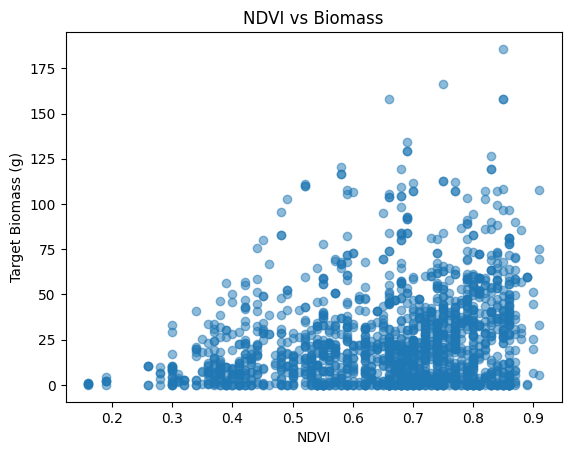

In [16]:
import matplotlib.pyplot as plt

plt.scatter(train['Pre_GSHH_NDVI'], train['target'], alpha=0.5)
plt.xlabel('NDVI')
plt.ylabel('Target Biomass (g)')
plt.title('NDVI vs Biomass')
plt.show()


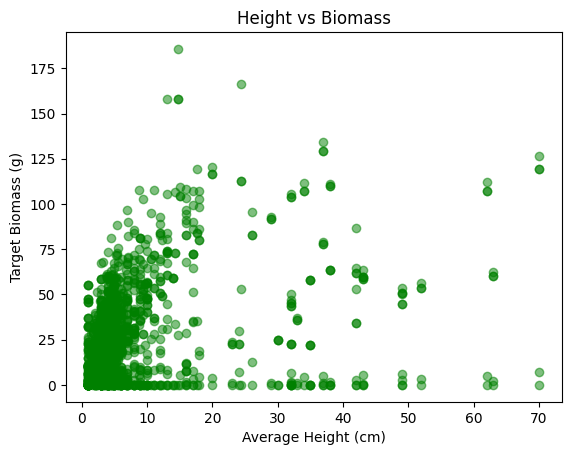

In [17]:
plt.scatter(train['Height_Ave_cm'], train['target'], alpha=0.5, color='green')
plt.xlabel('Average Height (cm)')
plt.ylabel('Target Biomass (g)')
plt.title('Height vs Biomass')
plt.show()


In [18]:
train[['Pre_GSHH_NDVI', 'Height_Ave_cm', 'target']].corr()


,Pre_GSHH_NDVI,Height_Ave_cm,target
Pre_GSHH_NDVI,1.000000,0.238434,0.246426
Height_Ave_cm,0.238434,1.000000,0.327695
target,0.246426,0.327695,1.000000


In [19]:
# Select useful features
features = ['Pre_GSHH_NDVI', 'Height_Ave_cm', 'State', 'Species', 'Season']

# Input (X) and Output (y)
X = train[features]
y = train['target']

X.head(), y.head()


(   Pre_GSHH_NDVI  Height_Ave_cm State          Species  Season
 0           0.62         4.6667   Tas  Ryegrass_Clover  Spring
 1           0.62         4.6667   Tas  Ryegrass_Clover  Spring
 2           0.62         4.6667   Tas  Ryegrass_Clover  Spring
 3           0.62         4.6667   Tas  Ryegrass_Clover  Spring
 4           0.62         4.6667   Tas  Ryegrass_Clover  Spring,
 0     0.0000
 1    31.9984
 2    16.2751
 3    48.2735
 4    16.2750
 Name: target, dtype: float64)

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in ['State', 'Species', 'Season']:
    X[col] = encoder.fit_transform(X[col])

X.head()


/tmp/ipython-input-2822367539.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
/tmp/ipython-input-2822367539.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
/tmp/ipython-input-2822367539.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,Pre_GSHH_NDVI,Height_Ave_cm,State,Species,Season
0,0.62,4.6667,1,11,1
1,0.62,4.6667,1,11,1
2,0.62,4.6667,1,11,1
3,0.62,4.6667,1,11,1
4,0.62,4.6667,1,11,1


In [21]:
X.isnull().sum()


,0
Pre_GSHH_NDVI,0
Height_Ave_cm,0
State,0
Species,0
Season,0


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])


Training samples: 1428
Validation samples: 357


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Model initialization
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Predict on validation data
y_pred = model.predict(X_val)

# Evaluate performance
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print("✅ Linear Regression Model Performance:")
print("R² Score:", r2)
print("Mean Squared Error:", mse)


✅ Linear Regression Model Performance:
R² Score: 0.18170716860528757
Mean Squared Error: 550.9330245755634


In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)

r2_rf = r2_score(y_val, y_pred_rf)
mse_rf = mean_squared_error(y_val, y_pred_rf)

print("🌳 Random Forest Model Performance:")
print("R² Score:", r2_rf)
print("Mean Squared Error:", mse_rf)


🌳 Random Forest Model Performance:
R² Score: 0.1422678377736999
Mean Squared Error: 577.4863915227583


In [26]:
from sklearn.svm import SVR

svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_val)

r2_svm = r2_score(y_val, y_pred_svm)
mse_svm = mean_squared_error(y_val, y_pred_svm)

print("🤖 SVM Model Performance:")
print("R² Score:", r2_svm)
print("Mean Squared Error:", mse_svm)


🤖 SVM Model Performance:
R² Score: 0.11142306243382394
Mean Squared Error: 598.2532914861707


In [ ]:
from google.colab import files
uploaded = files.upload()